<a href="https://colab.research.google.com/github/sr606/Machine_Learning_CaseStudies/blob/main/Business_Case_Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Business Case: Yulu - Hypothesis Testing**

#**About Yulu:**


Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

####**The company wants to know**


1.  Which variables are significant in predicting the demand for shared electric cycles in the Indian market?


2.  How well those variables describe the electric cycle demands

####**Column Profiling:**


datetime: datetime


season: season (1: spring, 2: summer, 3: fall, 4: winter)


holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)


workingday: if day is neither weekend nor holiday is 1, otherwise is 0.


weather:
1: Clear, Few clouds, partly cloudy, partly cloudy


2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist


3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds


4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


temp: temperature in Celsius


atemp: feeling temperature in Celsius


humidity: humidity


windspeed: wind speed


casual: count of casual users


registered: count of registered users


count: count of total rental bikes including both casual and registered

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Scaler/yulu_data.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
#checking null Values

df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


No Null Values found

In [6]:
#characteristics of data

df.describe(include = 'all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


We can see from above dataset that there are outliers in the column count of casual and registered users.

---



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Datatype of some attributes needs to changed to proper data type




*   datetime - to datetime
*   season - to categorical


*   holiday - to categorical
*   workingday - to categorical


*   weather - to categorical







In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

cat_cols = ['season', 'holiday', 'workingday', 'weather']
for i in cat_cols:
  df[i] = df[i].astype('object')

In [9]:
df.iloc[:, 1:].describe(include= 'all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


1.  No missing values in dataset

2.  casual and registered attributes have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these atributes.

In [10]:
#minimum datetime and maximum datetime

df['datetime'].min(), df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [11]:
# number of unique values in each categorical columns

df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

###**Univariate Analysis**

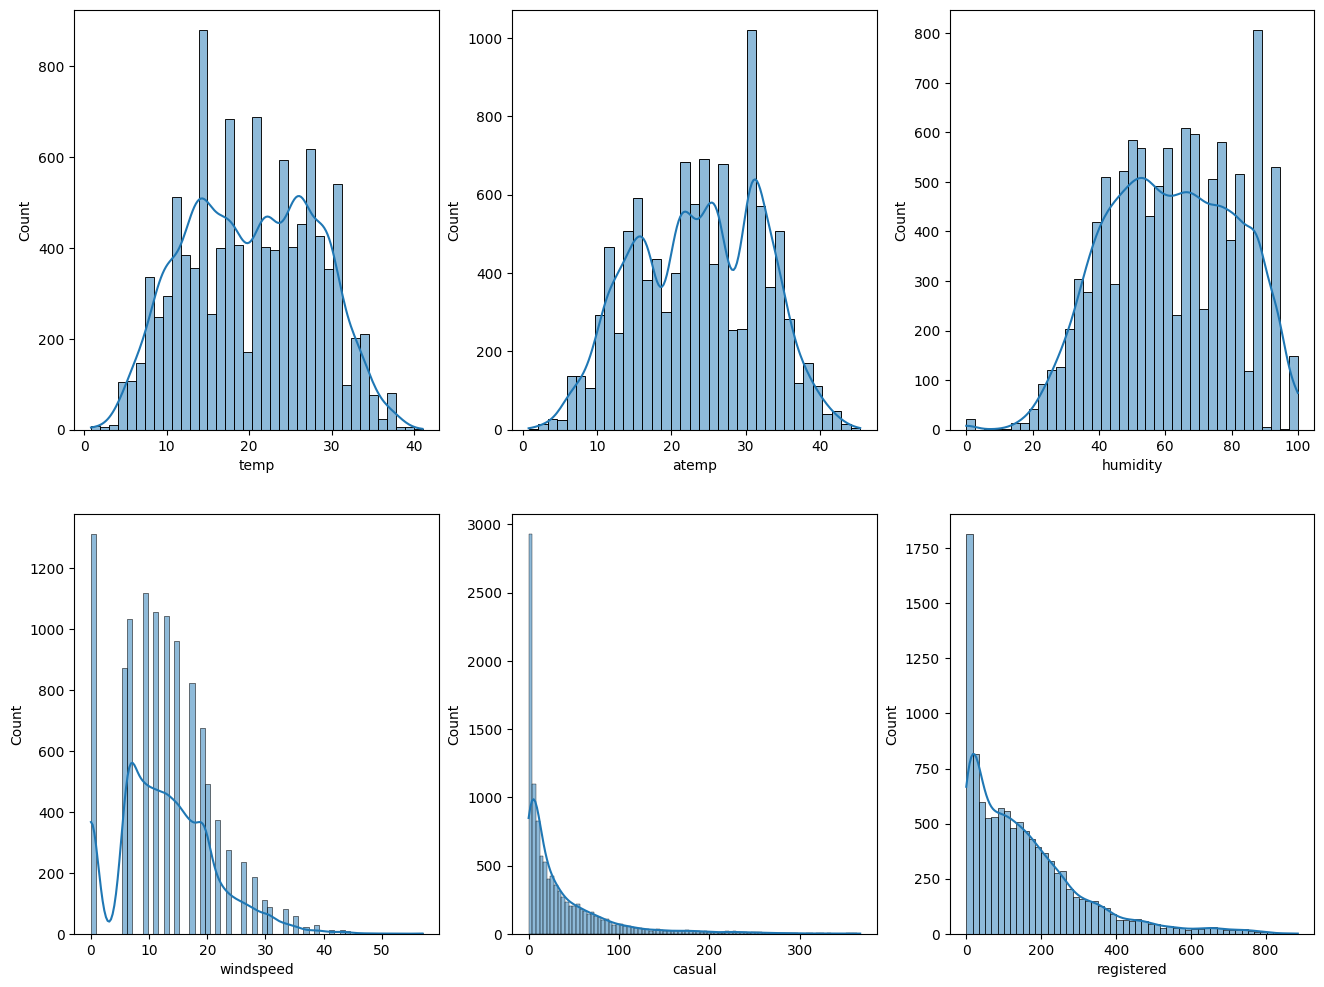

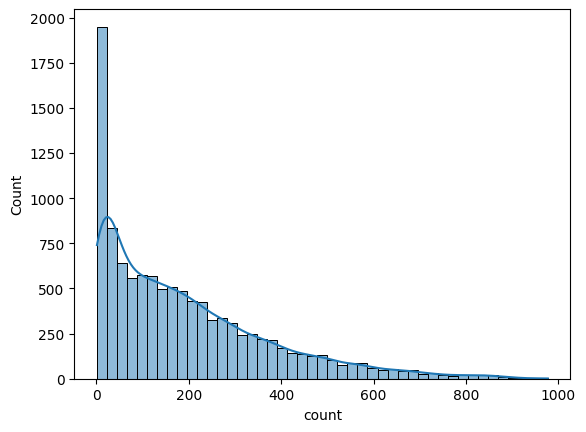

In [18]:
#understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

fig, axis = plt.subplots(nrows= 2, ncols = 3, figsize = (16,12))

index = 0
for row in range(2):
  for cols in range(3):
    sns.histplot(df[num_cols[index]], ax = axis[row,cols], kde = True)
    index += 1

plt.show()
sns.histplot(df[num_cols[-1]], kde = True)
plt.show()

we can see that humidity, casual,registered and count have outliers in data.


casual, refistered and count attributes have right skewed distribution

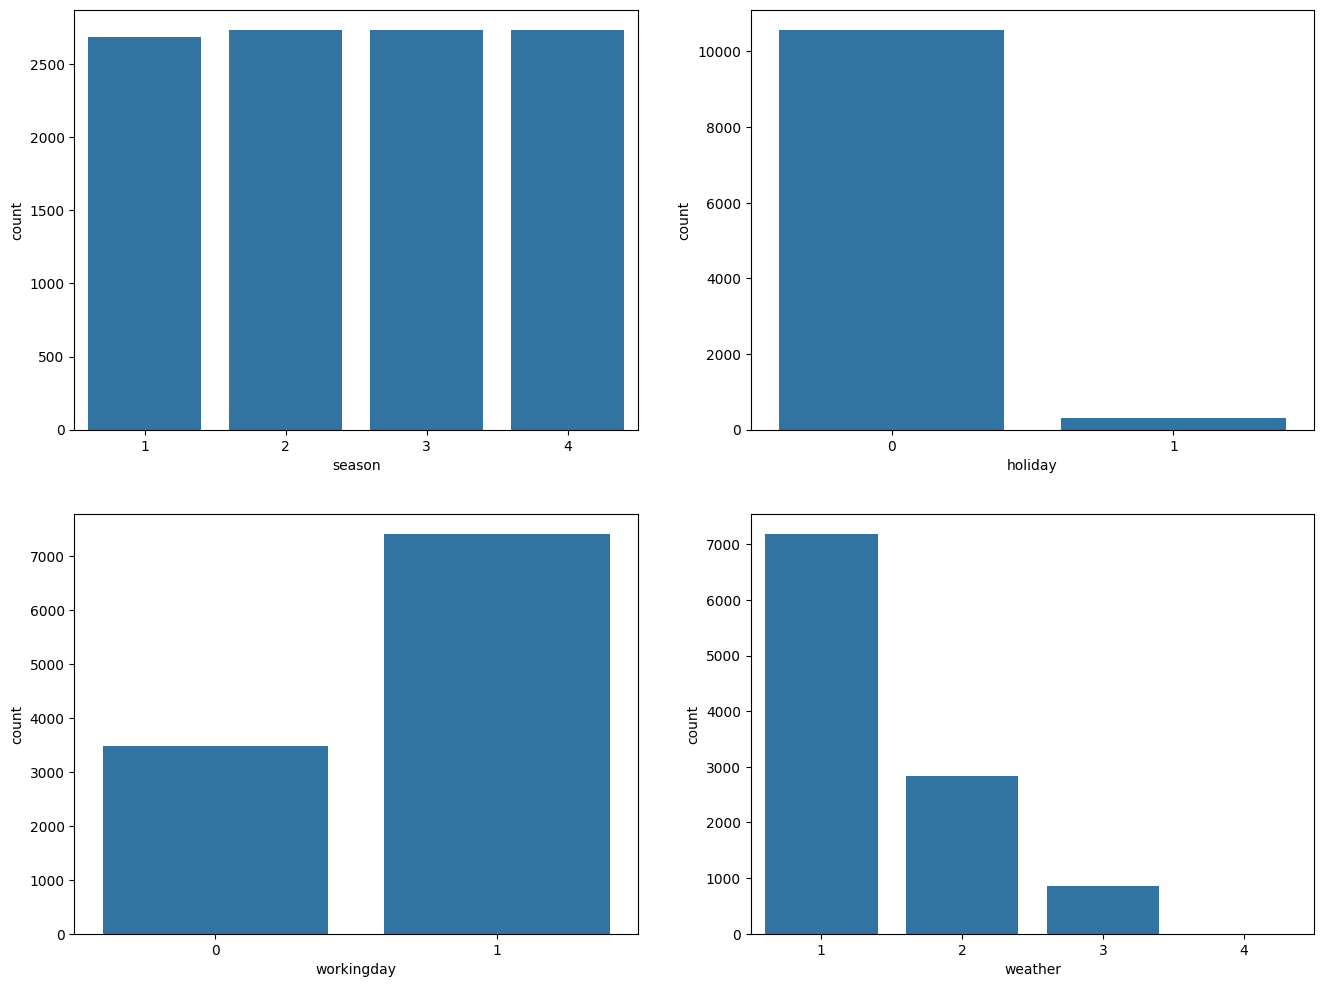

In [22]:
# countplot of each categorical column


fig,axis = plt.subplots(nrows = 2, ncols = 2, figsize = (16,12))


index = 0

for row in range(2):
  for col in range(2):
    sns.countplot(data = df, x = cat_cols[index], ax = axis[row,col])

    index += 1

plt.show()


Data looks uniform for seasons as there will equal no days in each season, we can see more working days and weather is mostly clear, few clouds, partly cloudy, no scenes of Heavy Rain/Ice Pallets/ Thunderstorm/Mist/Snow + Fog.

###**Bi - Variate Analysis**

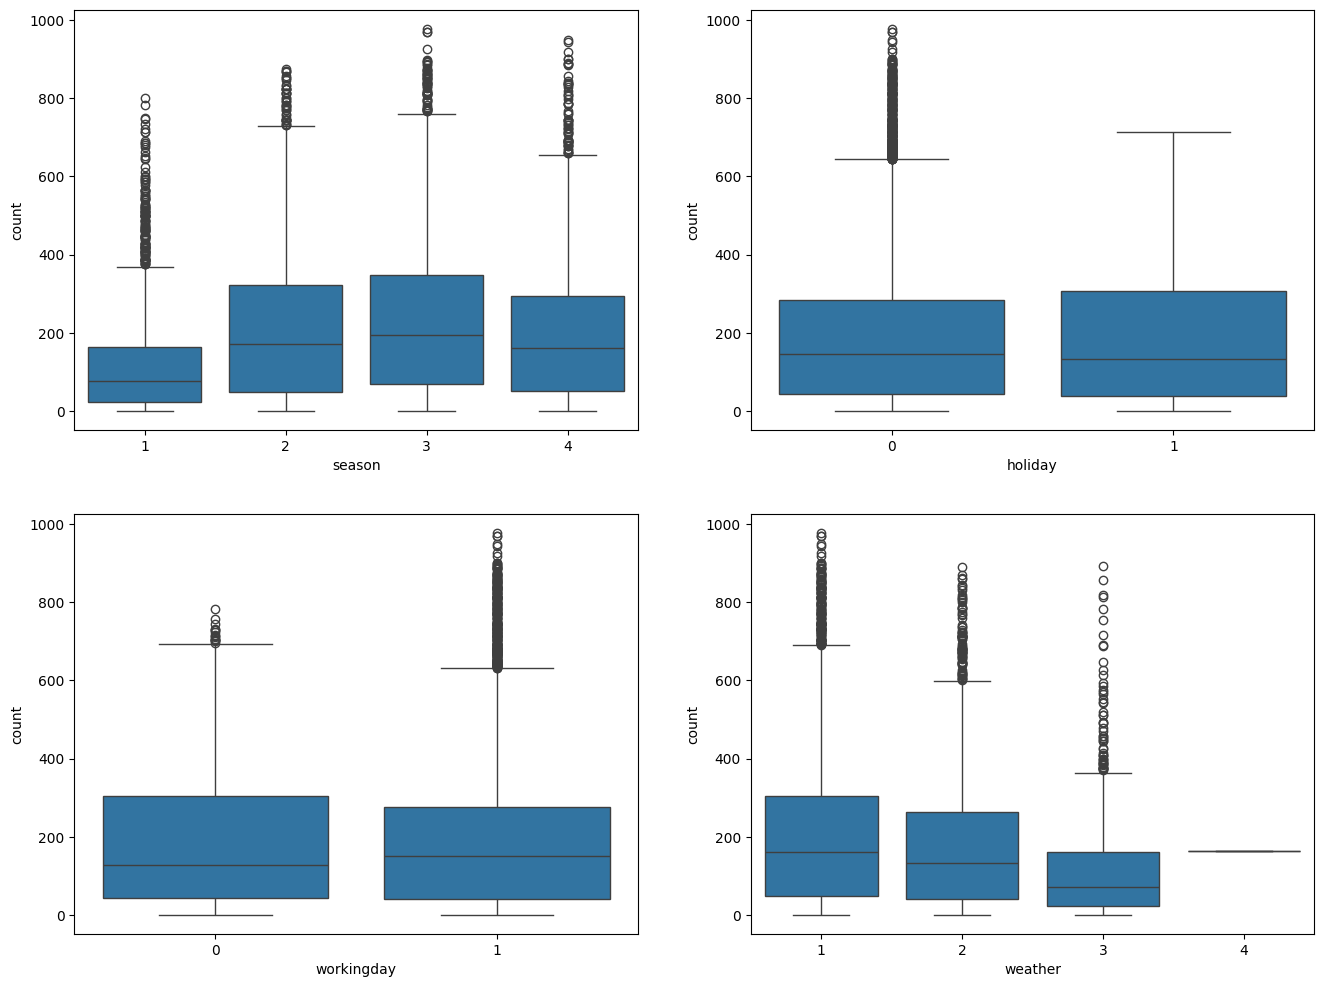

In [25]:
# plotting categorical variables against count using boxplots

fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (16,12))

index = 0

for row in range(2):
  for col in range(2):
    sns.boxplot(data = df, x = cat_cols[index], y = 'count', ax = axis[row,col])

    index += 1

plt.show()